In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
training_csv_file = 'training_data.csv'
df = pd.read_csv(training_csv_file)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.drop(labels='Loan_ID', axis=1, inplace=True)

In [4]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Enoding data
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
df['Education'] = df['Education'].map({'Not Graduate': 0, 'Graduate': 1})
df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})
df['Property_Area'] = df['Property_Area'].map({'Urban': 0, 'Semiurban': 1, 'Rural': 2})
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1


In [6]:
mode = df.mode()

# Categorical Data Imputation
df['Gender'].fillna(value=int(mode['Gender']), inplace=True)
df['Married'].fillna(value=int(mode['Married']), inplace=True)
df['Dependents'].fillna(value=int(mode['Dependents']), inplace=True)
df['Self_Employed'].fillna(value=int(mode['Self_Employed']), inplace=True)
df['Credit_History'].fillna(value=int(mode['Credit_History']), inplace=True)

# Continouos Data Imputation
df['LoanAmount'].fillna(value=df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].median(), inplace=True)

In [7]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1


In [8]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve, GridSearchCV, train_test_split, validation_curve, cross_val_score, StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [9]:
mu = np.mean(df, axis=0)[:-1]
sigma = np.std(df, axis=0)[:-1]

# mu - 2 sigma and mu + 2 sigma
lower_bound = np.array([mu[i] - (2 * sigma[i]) for i in range(len(mu))])
upper_bound = np.array([mu[i] + (2 * sigma[i]) for i in range(len(mu))])

In [10]:
X = df.drop(labels='Loan_Status', axis=1, inplace=False)
y = df['Loan_Status']
print(f"Data shape: {X.shape}, labels: {y.shape}")

cleaned = []
cleaned_labels = []
for i, row in enumerate(X.values):
    counter = 0
    for j, col in enumerate(row):
        if lower_bound[j] < col < upper_bound[j]:
            counter += 1
    if counter > 7:
        cleaned.append(row)
        cleaned_labels.append(y[i])

X = np.array(cleaned)
y = np.array(cleaned_labels)
print(f"New Data shape: {X.shape}, labels: {y.shape}")

Data shape: (614, 11), labels: (614,)
New Data shape: (608, 11), labels: (608,)


In [11]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
yhat = lof.fit_predict(X)
# 1 is an inlier and -1 is an outlier / anomaly
inliers = yhat != -1

X = X[inliers, :]
y = y[inliers]

print(f"After Outlier detection\nX: {X.shape}, y: {y.shape}")

After Outlier detection
X: (547, 11), y: (547,)


In [12]:
# Data will be split into 3 parts training, testing, and validation.
# As for now data will be split into training and testing. Later upon training models, training data will undergo
# another split for crosvalidation and once model has been trained and ready to be deployed, model will be tested on testing data.

x_, x_test, y_, y_test = train_test_split(X, y, test_size=0.01, random_state=42)
print(f"1. Training size: {x_.shape}, labels: {y_.shape}\n2. Testing size: {x_test.shape}, labels: {y_test.shape}")

# Normalizing data
norm = MinMaxScaler().fit(x_)
x_norm = norm.transform(x_)
x_test_norm = norm.transform(x_test)
print(f"3. [Normalized] training data shape: {x_norm.shape}, testing data shape: {x_test_norm.shape}")

# Standardizing data
standard = StandardScaler().fit(x_)
x_std = standard.transform(x_)
x_test_std = standard.transform(x_test)
print(f"4. [Standardized] training data shape: {x_std.shape}, testing data shape: {x_test_std.shape}")

1. Training size: (541, 11), labels: (541,)
2. Testing size: (6, 11), labels: (6,)
3. [Normalized] training data shape: (541, 11), testing data shape: (6, 11)
4. [Standardized] training data shape: (541, 11), testing data shape: (6, 11)


In [13]:
x_train, x_cv, y_train, y_cv = train_test_split(x_norm, y_, test_size=0.2, random_state=42)
print(f"[Train] Data shape: {x_train.shape}, labels: {y_train.shape}")
print(f"[Cross-Validation] Data shape: {x_cv.shape}, labels: {y_cv.shape}")

[Train] Data shape: (432, 11), labels: (432,)
[Cross-Validation] Data shape: (109, 11), labels: (109,)


# Logistic Regression

In [14]:
log_model = LogisticRegression(solver='liblinear', penalty='l2', random_state=42, C=10)
log_model.fit(x_train, y_train)

log_train_predictions = log_model.predict(x_train)
log_accuracy_train = accuracy_score(y_train, log_train_predictions)

log_predictions = log_model.predict(x_cv)
log_accuracy_cv = accuracy_score(y_cv, log_predictions)

print(f"[Logistic Regression] Training Accuracy: {log_accuracy_train * 100}")
print(f"[Logistic Regresion] Cross-Validation Accuracy: {log_accuracy_cv * 100}")

[Logistic Regression] Training Accuracy: 81.48148148148148
[Logistic Regresion] Cross-Validation Accuracy: 88.07339449541286


In [15]:
log_report = classification_report(y_cv, log_predictions)
print(log_report)

              precision    recall  f1-score   support

           0       1.00      0.61      0.75        33
           1       0.85      1.00      0.92        76

    accuracy                           0.88       109
   macro avg       0.93      0.80      0.84       109
weighted avg       0.90      0.88      0.87       109



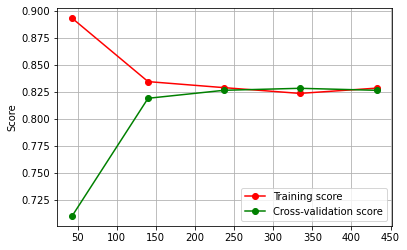

In [16]:
train_sizes, train_scores, test_scores = learning_curve(log_model, x_norm, y_, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.ylabel('Score')
plt.legend(loc="lower right")
plt.grid()

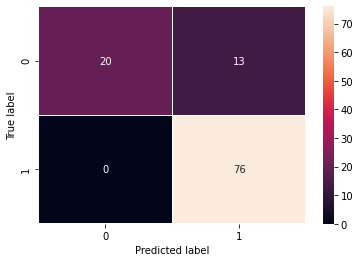

In [17]:
log_cm = confusion_matrix(y_cv, log_predictions)
sns.heatmap(log_cm, annot=True, linewidths=0.1)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [18]:
log_test_preds = log_model.predict(x_test_norm)
log_test_accuracy = accuracy_score(y_test, log_test_preds)
print(f"[Logistic Regression] Test data accuracy: {log_test_accuracy * 100}")

[Logistic Regression] Test data accuracy: 83.33333333333334


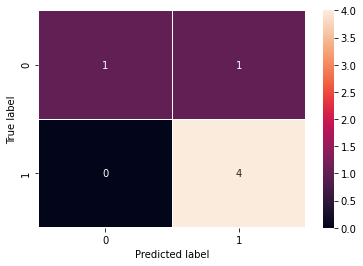

In [19]:
log_test_cm = confusion_matrix(y_test, log_test_preds)
sns.heatmap(log_test_cm, annot=True, linewidths=0.1)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Decision Trees

In [20]:
#tree_model = DecisionTreeClassifier(criterion='gini', max_depth=2, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2)
tree_model = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42, criterion='entropy', max_depth=7)# max_depth=7
tree_model.fit(x_train, y_train)

tree_training_predictions = tree_model.predict(x_train)
tree_training_accuracy = accuracy_score(y_train, tree_training_predictions)

tree_predictions = tree_model.predict(x_cv)
tree_accuracy = accuracy_score(y_cv, tree_predictions)

print(f"[Decision Tree] Training Accuracy: {tree_training_accuracy * 100}")
print(f"[Decision Tree] Cross-Validation Accuracy: {tree_accuracy * 100}")

[Decision Tree] Training Accuracy: 83.79629629629629
[Decision Tree] Cross-Validation Accuracy: 86.23853211009175


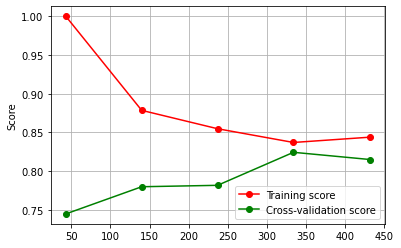

In [21]:
train_sizes, train_scores, test_scores = learning_curve(tree_model, x_norm, y_, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.ylabel('Score')
plt.legend(loc="lower right")
plt.grid()

In [22]:
tree_report = classification_report(y_cv, tree_predictions)
print(tree_report)

              precision    recall  f1-score   support

           0       1.00      0.55      0.71        33
           1       0.84      1.00      0.91        76

    accuracy                           0.86       109
   macro avg       0.92      0.77      0.81       109
weighted avg       0.89      0.86      0.85       109



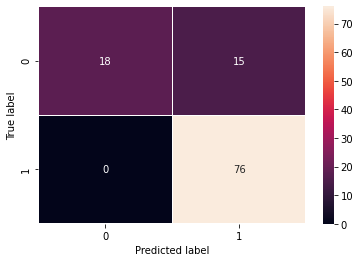

In [23]:
tree_cm = confusion_matrix(y_cv, tree_predictions)
sns.heatmap(tree_cm, annot=True, linewidths=0.1)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [24]:
tree_testing_preds = tree_model.predict(x_test_norm)
tree_testing_acc = accuracy_score(y_test, tree_testing_preds)
print(f"[Decision Tree] Testing Data Accuracy: {tree_testing_acc * 100}")

[Decision Tree] Testing Data Accuracy: 83.33333333333334


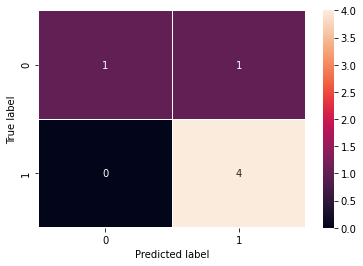

In [25]:
tree_test_cm = confusion_matrix(y_test, tree_testing_preds)
sns.heatmap(tree_test_cm, annot=True, linewidths=0.1)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

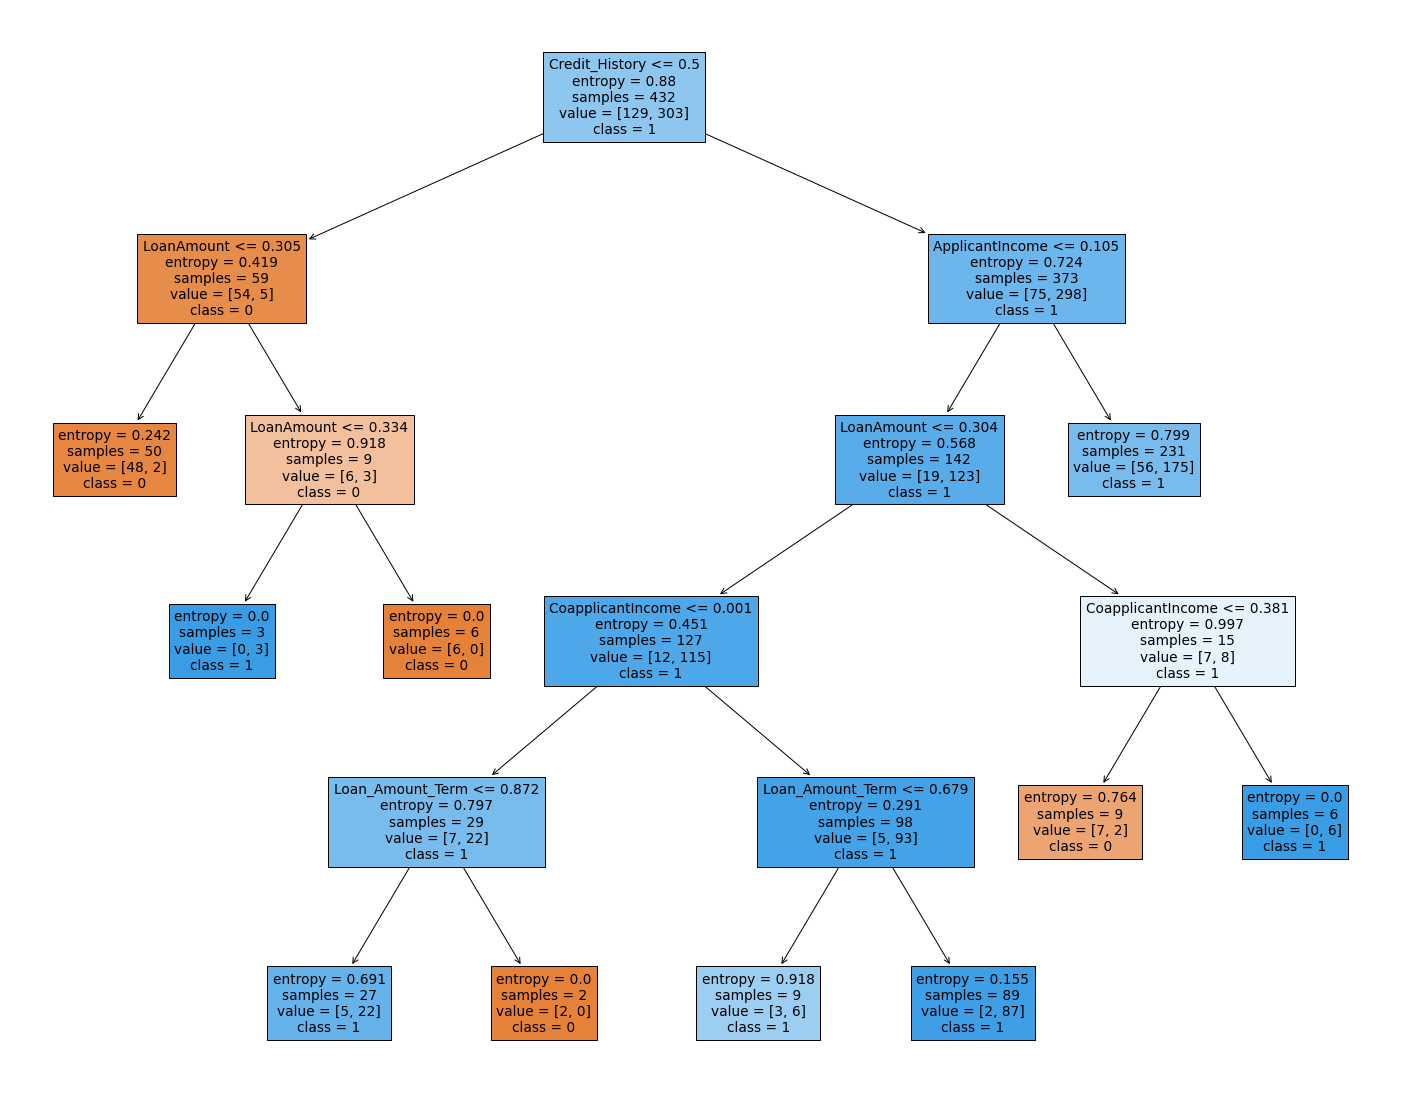

In [26]:
plt.figure(figsize=(25, 20))
plot_tree(tree_model, feature_names=df.keys()[:-1], class_names=['0', '1'], filled=True)
plt.show()

# KNN

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=15, p=3, weights='uniform', leaf_size=1)
knn_model.fit(x_train, y_train)

knn_train_preds = knn_model.predict(x_train)
knn_train_acc = accuracy_score(y_train, knn_train_preds)

knn_preds = knn_model.predict(x_cv)
knn_acc = accuracy_score(y_cv, knn_preds)

print(f"[KNN] Training Accuracy: {knn_train_acc * 100}")
print(f"[KNN] Cross-Validation Accuracy: {knn_acc * 100}")

[KNN] Training Accuracy: 81.01851851851852
[KNN] Cross-Validation Accuracy: 88.07339449541286


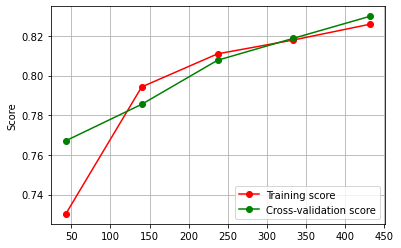

In [28]:
train_sizes, train_scores, test_scores = learning_curve(knn_model, x_norm, y_, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.ylabel('Score')
plt.legend(loc="lower right")
plt.grid()

In [29]:
knn_report = classification_report(y_cv, knn_preds)
print(knn_report)

              precision    recall  f1-score   support

           0       1.00      0.61      0.75        33
           1       0.85      1.00      0.92        76

    accuracy                           0.88       109
   macro avg       0.93      0.80      0.84       109
weighted avg       0.90      0.88      0.87       109



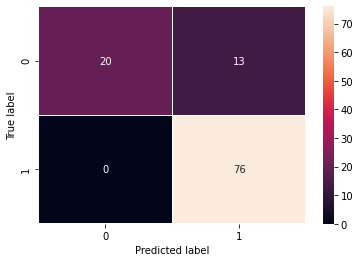

In [30]:
knn_cm = confusion_matrix(y_cv, knn_preds)
sns.heatmap(knn_cm, annot=True, linewidths=0.1)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [31]:
knn_testing_preds = knn_model.predict(x_test_norm)
knn_testing_acc = accuracy_score(y_test, knn_testing_preds)
print(f"[KNN] Testing Accuracy: {knn_testing_acc * 100}")

[KNN] Testing Accuracy: 83.33333333333334


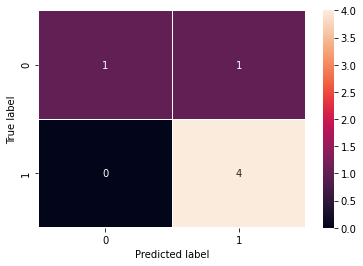

In [32]:
knn_test_cm = confusion_matrix(y_test, knn_testing_preds)
sns.heatmap(knn_test_cm, annot=True, linewidths=0.1)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Random Forest Classification

In [33]:
forest_model = RandomForestClassifier(max_depth=7, random_state=42)
forest_model.fit(x_train, y_train)

forest_training_preds = forest_model.predict(x_train)
forest_training_acc = accuracy_score(y_train, forest_training_preds)

forest_preds = forest_model.predict(x_cv)
forest_acc = accuracy_score(y_cv, forest_preds)

print(f"[Random Forest Classification] Training Accuracy: {forest_training_acc * 100}")
print(f"[Random Forest Classification] Cross-validation Accuracy: {forest_acc * 100}")

[Random Forest Classification] Training Accuracy: 84.95370370370371
[Random Forest Classification] Cross-validation Accuracy: 88.9908256880734


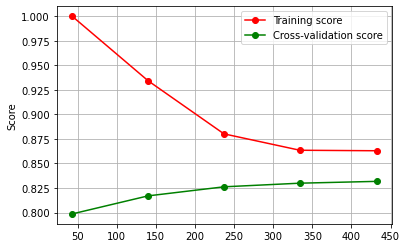

In [34]:
train_sizes, train_scores, test_scores = learning_curve(forest_model, x_norm, y_, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.ylabel('Score')
plt.legend(loc="upper right")
plt.grid()

In [35]:
forest_report = classification_report(y_cv, forest_preds)
print(forest_report)

              precision    recall  f1-score   support

           0       0.96      0.67      0.79        33
           1       0.87      0.99      0.93        76

    accuracy                           0.89       109
   macro avg       0.91      0.83      0.86       109
weighted avg       0.90      0.89      0.88       109



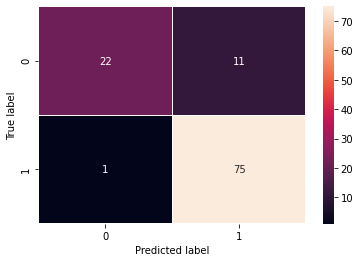

In [36]:
forest_cm = confusion_matrix(y_cv, forest_preds)
sns.heatmap(forest_cm, annot=True, linewidths=0.1)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [37]:
forest_testing_preds = forest_model.predict(x_test_norm)
forest_testing_acc = accuracy_score(y_test, forest_testing_preds)
print(f"[Random Forest Classification] Testing Accuracy: {forest_testing_acc * 100}")

[Random Forest Classification] Testing Accuracy: 83.33333333333334


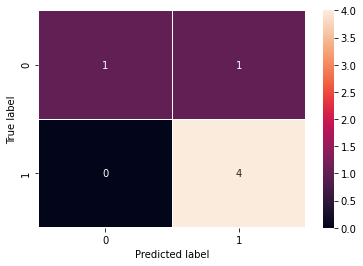

In [38]:
forest_test_cm = confusion_matrix(y_test, forest_testing_preds)
sns.heatmap(forest_test_cm, annot=True, linewidths=0.1)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [39]:
log_all_scores = [log_accuracy_train, log_accuracy_cv, log_test_accuracy]
tree_all_scores = [tree_training_accuracy, tree_accuracy, tree_testing_acc]
knn_all_scores = [knn_train_acc, knn_acc, knn_testing_acc]
forest_all_scores = [forest_training_acc, forest_acc, forest_testing_acc]

column_titles = ['Training', 'Cross_validation', 'Testing']
rows_titles = ['Logisitc_regression', 'Decision_tree', 'K-Nearest Neighbor (KNN)', 'Random Forest Classifier']

scores_df = pd.DataFrame(data=np.row_stack((log_all_scores, tree_all_scores, knn_all_scores, forest_all_scores)),
                        index=rows_titles, columns=column_titles)

scores_df

,Training,Cross_validation,Testing
Logisitc_regression,0.814815,0.880734,0.833333
Decision_tree,0.837963,0.862385,0.833333
K-Nearest Neighbor (KNN),0.810185,0.880734,0.833333
Random Forest Classifier,0.849537,0.889908,0.833333
